In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('train.csv', sep =";")

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
for data in df.select_dtypes(include=object).columns:
    print(df[data].value_counts())
    print("-" * 50)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
--------------------------------------------------
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
--------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
--------------------------------------------------
default
no     44396
yes      815
Name: count, dtype: int64
--------------------------------------------------
housing
yes    25130
no     20081
Name: count, dtype: int64
--------------------------------------------------
loan
no     37967
yes     7244
Name: count, dtype: int64
--------------------------------------------------
contact
cellular     29

In [10]:
df = df[df['job'] != 'unknown']

In [11]:
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])

In [12]:
df['contact'] = df['contact'].replace('unknown', df['contact'].mode()[0])

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,-1,0,unknown,no


In [14]:
y = pd.get_dummies(df['y'], dtype=int, drop_first=True)

In [15]:
y.head()

,yes
0,0
1,0
2,0
3,0
5,0


In [16]:
df = pd.concat([df, y], axis=1)
df.drop('y', axis=1, inplace=True)

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,yes
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,-1,0,unknown,0


In [18]:
Housing = pd.get_dummies(df['housing'], dtype=int, drop_first=True, prefix='h_loan')
Housing.head()

,h_loan_yes
0,1
1,1
2,1
3,1
5,1


In [19]:
Loan = pd.get_dummies(df['loan'], dtype=int, drop_first=True, prefix='p_loan')
Loan.head()

,p_loan_yes
0,0
1,0
2,1
3,0
5,0


In [20]:
Default = pd.get_dummies(df['default'], dtype=int, drop_first=True, prefix='Default')
Default.head()

,Default_yes
0,0
1,0
2,0
3,0
5,0


In [21]:
df = pd.concat([df, Housing, Loan, Default], axis=1)

In [22]:
drop = ['housing', 'loan', 'default']
df = df.drop(drop, axis=1, inplace=False)

df.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,yes,h_loan_yes,p_loan_yes,Default_yes
0,58,management,married,tertiary,2143,cellular,5,may,261,1,-1,0,unknown,0,1,0,0
1,44,technician,single,secondary,29,cellular,5,may,151,1,-1,0,unknown,0,1,0,0
2,33,entrepreneur,married,secondary,2,cellular,5,may,76,1,-1,0,unknown,0,1,1,0
3,47,blue-collar,married,secondary,1506,cellular,5,may,92,1,-1,0,unknown,0,1,0,0
5,35,management,married,tertiary,231,cellular,5,may,139,1,-1,0,unknown,0,1,0,0


In [23]:
data_vis = df.copy()

In [24]:
corr = data_vis.corr(numeric_only=True)

<Axes: >

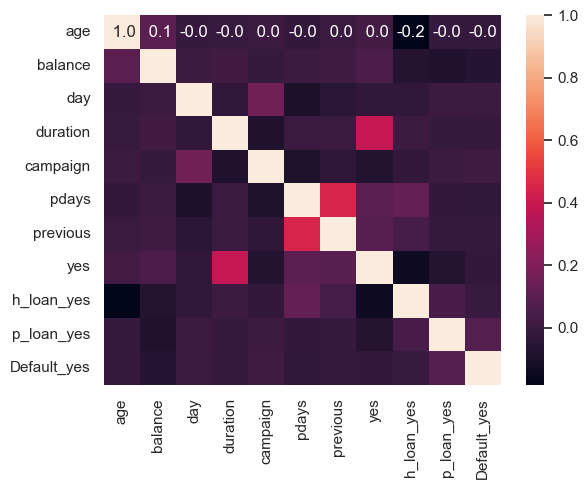

In [25]:
sns.heatmap(corr, annot=True, fmt = ' .1f')

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='job', ylabel='Count'>

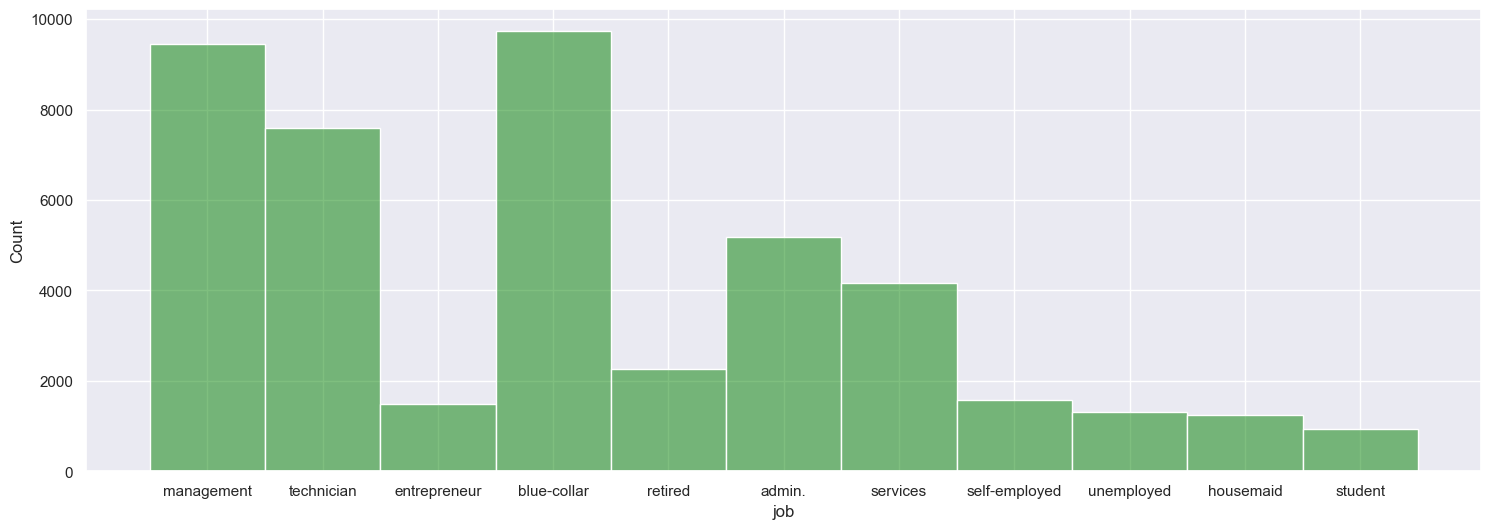

In [26]:
plt.figure(figsize=(18, 6))
sns.histplot(x='job', data=data_vis, color='green', alpha =0.5)

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Subscribe Probability by Job')

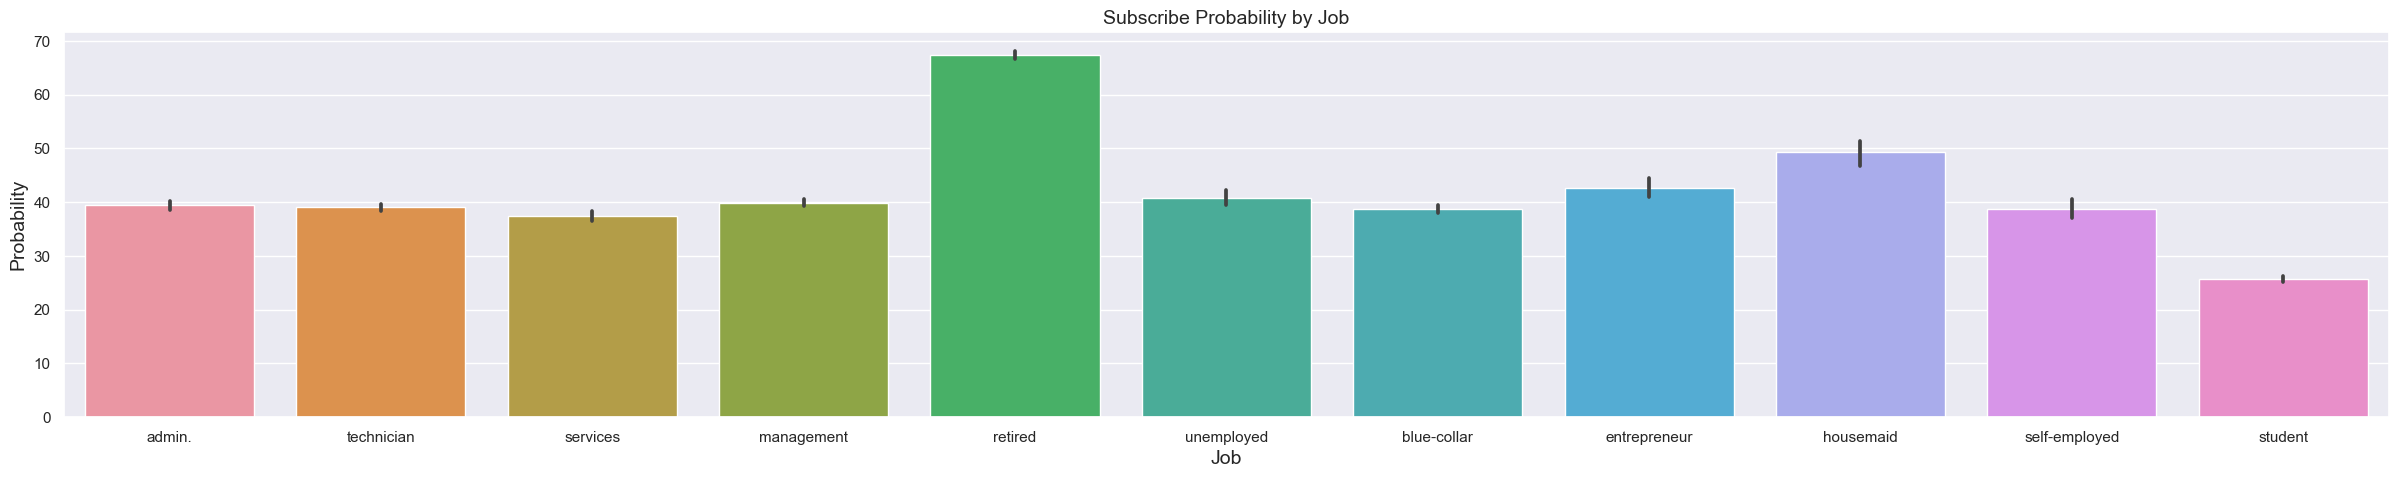

In [27]:
plt.figure( figsize = (30, 5))
sns.barplot(y = 'age', x ='job', data=data_vis.loc[data_vis['yes'] == 1.0])
plt.xlabel("Job", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.title("Subscribe Probability by Job", fontsize = 14)

In [28]:
# Top Occupations: managemaent, techincian, blue-collar, followed by admin and services

In [29]:
df_yes = data_vis.loc[data_vis['yes'] == 1.0]
df_no = data_vis.loc[data_vis['yes'] == 0.0]

In [30]:
age_yes = df_yes['age'].value_counts().sort_index()
age_no = df_no['age'].value_counts().sort_index()

Text(0.5, 1.0, 'Age vs. People Saying No')

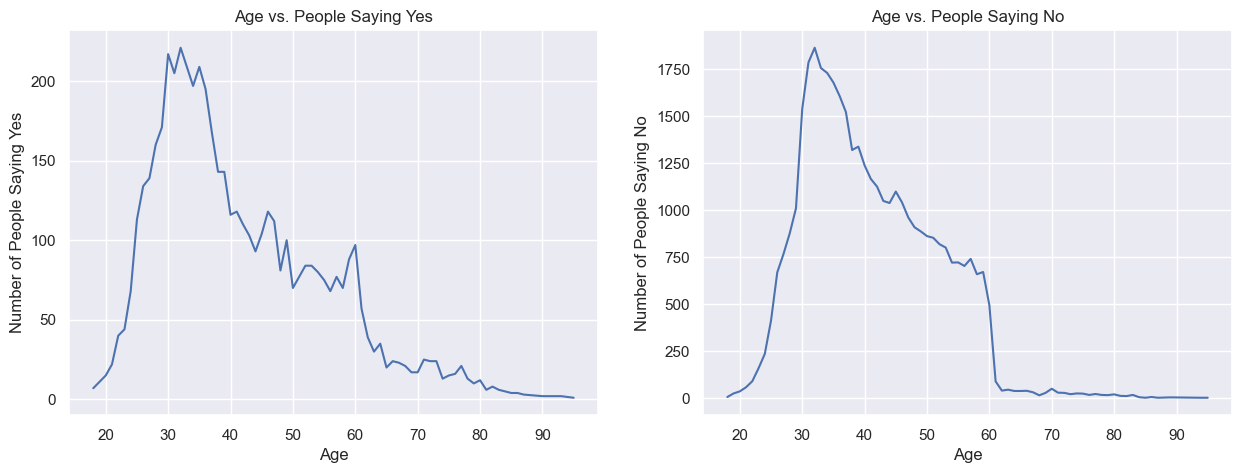

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(age_yes.index, age_yes.values)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of People Saying Yes')
axes[0].set_title('Age vs. People Saying Yes')

axes[1].plot(age_no.index, age_no.values)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Number of People Saying No')
axes[1].set_title('Age vs. People Saying No')


In [32]:
#plt.figure(figsize = (17, 5))
#sns.displot(data_vis.loc[data_vis.yes== 0, 'age'], label = "Not Subscribed", bins=30)
#sns.displot(data_vis.loc[data_vis.yes== 1, 'age'], label = "Subscribed")
#plt.title("Age Distribution by Subscription")


In [33]:
df_hl_yes = data_vis.loc[data_vis['h_loan_yes'] == 1.0]
df_hl_no = data_vis.loc[data_vis['h_loan_yes'] == 0.0]
df_hl_yes.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,yes,h_loan_yes,p_loan_yes,Default_yes
0,58,management,married,tertiary,2143,cellular,5,may,261,1,-1,0,unknown,0,1,0,0
1,44,technician,single,secondary,29,cellular,5,may,151,1,-1,0,unknown,0,1,0,0
2,33,entrepreneur,married,secondary,2,cellular,5,may,76,1,-1,0,unknown,0,1,1,0
3,47,blue-collar,married,secondary,1506,cellular,5,may,92,1,-1,0,unknown,0,1,0,0
5,35,management,married,tertiary,231,cellular,5,may,139,1,-1,0,unknown,0,1,0,0


In [34]:
age_hl_yes = df_hl_yes['age'].value_counts().sort_index()
age_hl_no = df_hl_no['age'].value_counts().sort_index()

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age vs. People having Housing Loan')

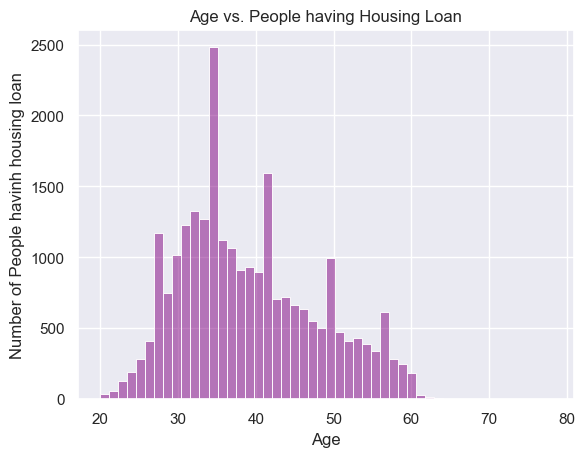

In [35]:
sns.histplot(df_hl_yes['age'], bins=50, color='purple', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Number of People havinh housing loan')
plt.title('Age vs. People having Housing Loan')

Text(0.5, 1.0, 'Age vs. People having Housing Loan Saying No')

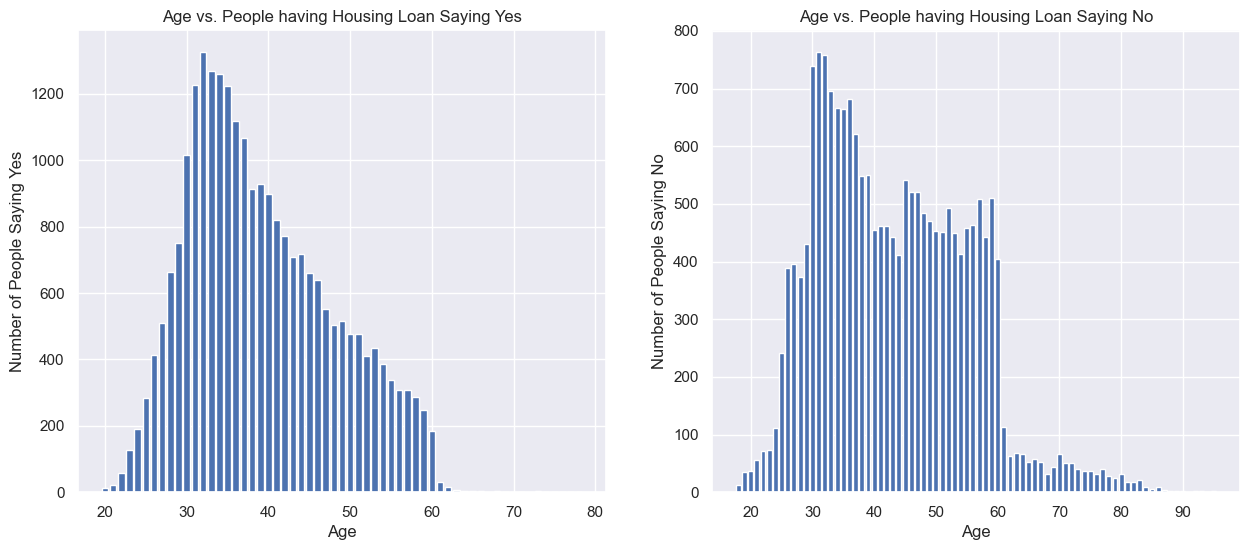

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].bar(age_hl_yes.index, age_hl_yes.values)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of People Saying Yes')
axes[0].set_title('Age vs. People having Housing Loan Saying Yes')

axes[1].bar(age_hl_no.index, age_hl_no.values)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Number of People Saying No')
axes[1].set_title('Age vs. People having Housing Loan Saying No')


In [37]:
df_pl_yes = data_vis[data_vis['p_loan_yes'] == 1.0]
df_pl_no = data_vis[data_vis['p_loan_yes'] == 0.0]

In [38]:
age_pl_yes = df_pl_yes['age'].value_counts().sort_index()
age_pl_no = df_pl_no['age'].value_counts().sort_index() 

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

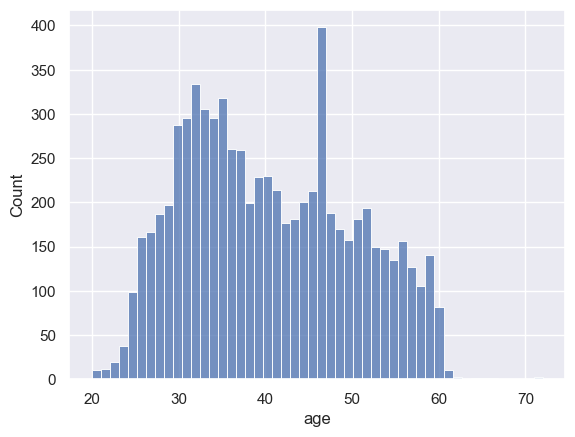

In [39]:
sns.histplot(df_pl_yes['age'], bins=50)

Text(0.5, 1.0, 'Age vs. People having Personal Loan Saying No')

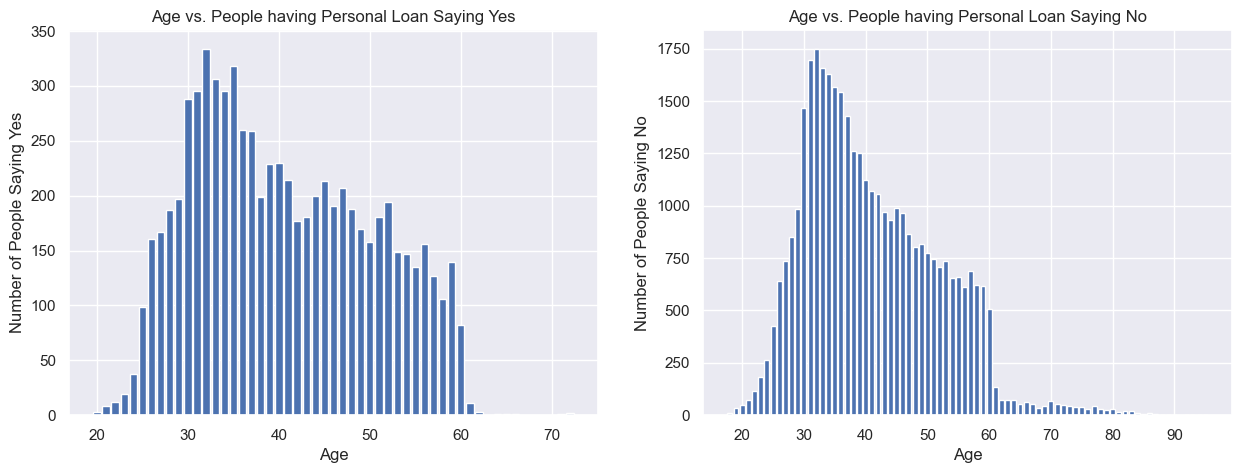

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(age_pl_yes.index, age_pl_yes.values)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of People Saying Yes')
axes[0].set_title('Age vs. People having Personal Loan Saying Yes')

axes[1].bar(age_pl_no.index, age_pl_no.values)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Number of People Saying No')
axes[1].set_title('Age vs. People having Personal Loan Saying No')

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Subscribe Probability by Marital Situation')

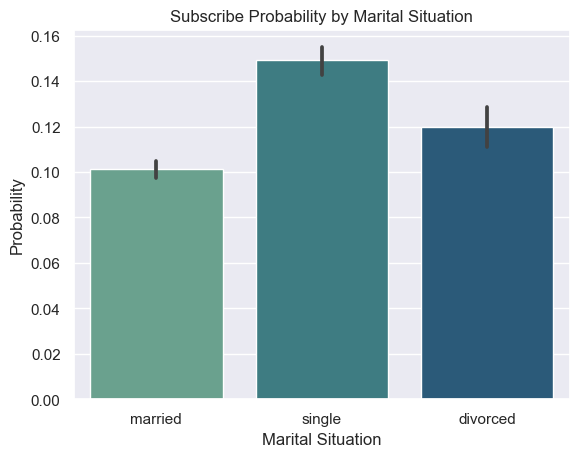

In [41]:
sns.barplot(x = 'marital', y = 'yes', data = data_vis, palette='crest')
plt.xlabel("Marital Situation", fontsize = 12)
plt.ylabel("Probability", fontsize = 12)
plt.title("Subscribe Probability by Marital Situation", fontsize = 12)


D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Subscribe Probability by Education')

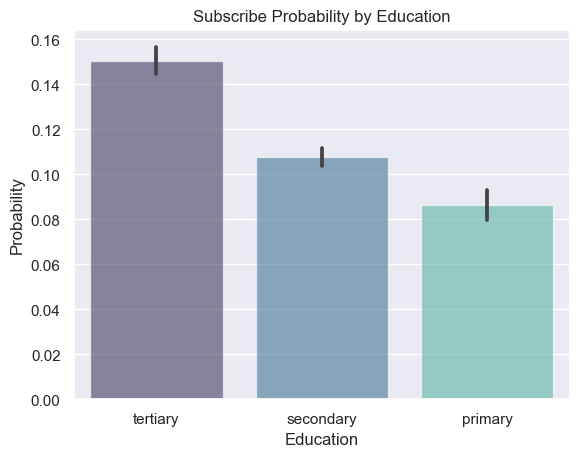

In [42]:
sns.barplot(x = 'education', y = 'yes', data = data_vis, palette='mako', alpha=0.6)
plt.xlabel("Education", fontsize = 12)
plt.ylabel("Probability", fontsize = 12)
plt.title("Subscribe Probability by Education", fontsize = 12)

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration', ylabel='Count'>

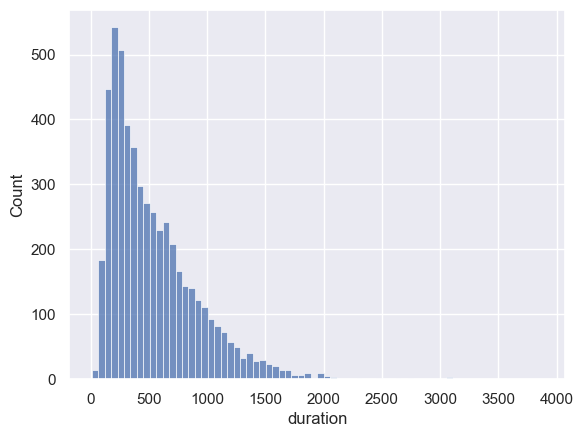

In [43]:
sns.histplot(df_yes['duration'])

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pdays', ylabel='Count'>

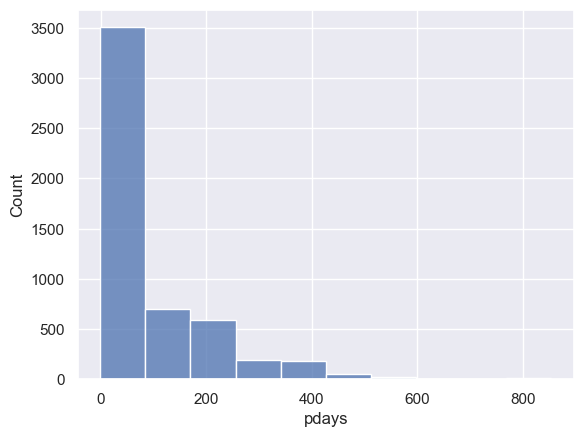

In [44]:
sns.histplot(df_yes['pdays'], bins=10)

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='balance', ylabel='Count'>

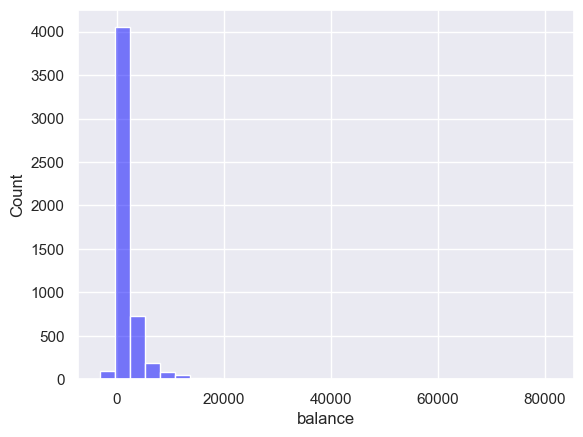

In [45]:
sns.histplot(df_yes['balance'], bins=30, color='blue', alpha=0.5)

In [46]:
# Number of people having default and said yes
data_vis.loc[(data_vis['Default_yes'] == 1.0) & (data_vis['yes'] == 1.0)].value_counts().sum()

52

In [47]:
# Number of people having default and said no
data_vis.loc[(data_vis['Default_yes'] == 1.0) & (data_vis['yes'] == 0.0)].value_counts().sum()

761

In [48]:
# Number of people who don't have default and said yes
data_vis.loc[(data_vis['Default_yes'] == 0.0) & (data_vis['yes'] == 1.0)].value_counts().sum()

5203

In [49]:
# Number of people who don't have default and said no
data_vis.loc[(data_vis['Default_yes'] == 0.0) & (data_vis['yes'] == 0.0)].value_counts().sum()

38907

D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Age distribution by Job dividrd by SUbscription')

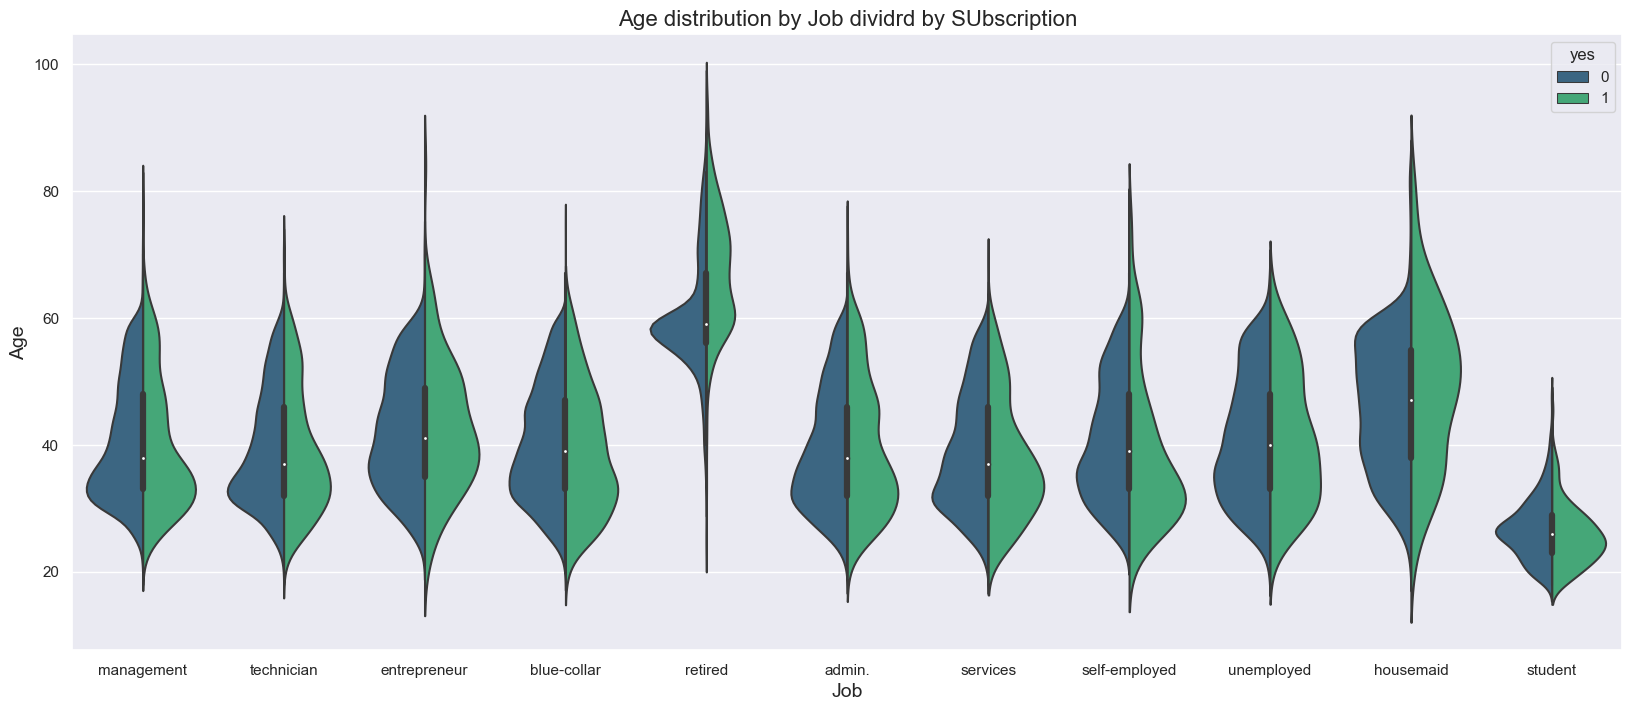

In [50]:
plt.figure( figsize = (20, 8))
sns.violinplot(x='job', y='age', hue='yes', data=data_vis, split=True, palette='viridis')
plt.xlabel('Job', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Age distribution by Job dividrd by SUbscription', fontsize=16)


# Model Training

In [51]:
data_train = df.copy()

In [52]:
data_train.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,yes,h_loan_yes,p_loan_yes,Default_yes
0,58,management,married,tertiary,2143,cellular,5,may,261,1,-1,0,unknown,0,1,0,0
1,44,technician,single,secondary,29,cellular,5,may,151,1,-1,0,unknown,0,1,0,0
2,33,entrepreneur,married,secondary,2,cellular,5,may,76,1,-1,0,unknown,0,1,1,0
3,47,blue-collar,married,secondary,1506,cellular,5,may,92,1,-1,0,unknown,0,1,0,0
5,35,management,married,tertiary,231,cellular,5,may,139,1,-1,0,unknown,0,1,0,0


In [53]:
data_train.drop('poutcome', axis = 1, inplace = True)
data_train.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,yes,h_loan_yes,p_loan_yes,Default_yes
0,58,management,married,tertiary,2143,cellular,5,may,261,1,-1,0,0,1,0,0
1,44,technician,single,secondary,29,cellular,5,may,151,1,-1,0,0,1,0,0
2,33,entrepreneur,married,secondary,2,cellular,5,may,76,1,-1,0,0,1,1,0
3,47,blue-collar,married,secondary,1506,cellular,5,may,92,1,-1,0,0,1,0,0
5,35,management,married,tertiary,231,cellular,5,may,139,1,-1,0,0,1,0,0


In [54]:
#secondary    23202
#tertiary     13301
#primary       6851
#unknown       1857

#data_train['education'] = data_train['education'].replace('unknown', data_train['education'].mode()[0])

In [55]:
data_train['education'].value_counts()

education
secondary    24861
tertiary     13262
primary       6800
Name: count, dtype: int64

In [56]:
data_train.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,yes,h_loan_yes,p_loan_yes,Default_yes
0,58,management,married,tertiary,2143,cellular,5,may,261,1,-1,0,0,1,0,0
1,44,technician,single,secondary,29,cellular,5,may,151,1,-1,0,0,1,0,0
2,33,entrepreneur,married,secondary,2,cellular,5,may,76,1,-1,0,0,1,1,0
3,47,blue-collar,married,secondary,1506,cellular,5,may,92,1,-1,0,0,1,0,0
5,35,management,married,tertiary,231,cellular,5,may,139,1,-1,0,0,1,0,0


In [57]:
edu_map = {'primary': 1, 'secondary':2 , 'tertiary':3}

In [58]:
data_train['education'] = data_train['education'].replace(edu_map)

In [59]:
data_train.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,yes,h_loan_yes,p_loan_yes,Default_yes
0,58,management,married,3,2143,cellular,5,may,261,1,-1,0,0,1,0,0
1,44,technician,single,2,29,cellular,5,may,151,1,-1,0,0,1,0,0
2,33,entrepreneur,married,2,2,cellular,5,may,76,1,-1,0,0,1,1,0
3,47,blue-collar,married,2,1506,cellular,5,may,92,1,-1,0,0,1,0,0
5,35,management,married,3,231,cellular,5,may,139,1,-1,0,0,1,0,0


In [60]:
marital_map = {'single': 1, 'married': 2, 'divorced': 3}
data_train['marital'] = data_train['marital'].replace(marital_map)

In [61]:
data_train.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,yes,h_loan_yes,p_loan_yes,Default_yes
0,58,management,2,3,2143,cellular,5,may,261,1,-1,0,0,1,0,0
1,44,technician,1,2,29,cellular,5,may,151,1,-1,0,0,1,0,0
2,33,entrepreneur,2,2,2,cellular,5,may,76,1,-1,0,0,1,1,0
3,47,blue-collar,2,2,1506,cellular,5,may,92,1,-1,0,0,1,0,0
5,35,management,2,3,231,cellular,5,may,139,1,-1,0,0,1,0,0


In [62]:
"""
cellular     29285
unknown      13020
telephone     2906

"""

data_train['contact'].value_counts()

contact
cellular     42063
telephone     2860
Name: count, dtype: int64

In [63]:
data_train.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,yes,h_loan_yes,p_loan_yes,Default_yes
0,58,management,2,3,2143,cellular,5,may,261,1,-1,0,0,1,0,0
1,44,technician,1,2,29,cellular,5,may,151,1,-1,0,0,1,0,0
2,33,entrepreneur,2,2,2,cellular,5,may,76,1,-1,0,0,1,1,0
3,47,blue-collar,2,2,1506,cellular,5,may,92,1,-1,0,0,1,0,0
5,35,management,2,3,231,cellular,5,may,139,1,-1,0,0,1,0,0


In [64]:
contact_map = {'cellular': 1, 'telephone': 2}
data_train['contact'] = data_train['contact'].replace(contact_map)

In [65]:
data_train.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,yes,h_loan_yes,p_loan_yes,Default_yes
0,58,management,2,3,2143,1,5,may,261,1,-1,0,0,1,0,0
1,44,technician,1,2,29,1,5,may,151,1,-1,0,0,1,0,0
2,33,entrepreneur,2,2,2,1,5,may,76,1,-1,0,0,1,1,0
3,47,blue-collar,2,2,1506,1,5,may,92,1,-1,0,0,1,0,0
5,35,management,2,3,231,1,5,may,139,1,-1,0,0,1,0,0


In [66]:
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
data_train['month'] = data_train['month'].replace(month_map)

In [67]:
data_train.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,yes,h_loan_yes,p_loan_yes,Default_yes
0,58,management,2,3,2143,1,5,5,261,1,-1,0,0,1,0,0
1,44,technician,1,2,29,1,5,5,151,1,-1,0,0,1,0,0
2,33,entrepreneur,2,2,2,1,5,5,76,1,-1,0,0,1,1,0
3,47,blue-collar,2,2,1506,1,5,5,92,1,-1,0,0,1,0,0
5,35,management,2,3,231,1,5,5,139,1,-1,0,0,1,0,0


In [68]:
data_train['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

In [69]:
jobs = ['job']

In [70]:
data_train = pd.get_dummies(data_train, columns=jobs, drop_first=True, dtype=float)

In [71]:
data_train.head()

,age,marital,education,balance,contact,day,month,duration,campaign,pdays,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,2,3,2143,1,5,5,261,1,-1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,1,2,29,1,5,5,151,1,-1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,33,2,2,2,1,5,5,76,1,-1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,2,2,1506,1,5,5,92,1,-1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,35,2,3,231,1,5,5,139,1,-1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44923 entries, 0 to 45210
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                44923 non-null  int64  
 1   marital            44923 non-null  int64  
 2   education          44923 non-null  int64  
 3   balance            44923 non-null  int64  
 4   contact            44923 non-null  int64  
 5   day                44923 non-null  int64  
 6   month              44923 non-null  int64  
 7   duration           44923 non-null  int64  
 8   campaign           44923 non-null  int64  
 9   pdays              44923 non-null  int64  
 10  previous           44923 non-null  int64  
 11  yes                44923 non-null  int32  
 12  h_loan_yes         44923 non-null  int32  
 13  p_loan_yes         44923 non-null  int32  
 14  Default_yes        44923 non-null  int32  
 15  job_blue-collar    44923 non-null  float64
 16  job_entrepreneur   44923 no

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# ['age','education', 'duration','h_loan_yes', 'p_loan_yes', 'Default_yes', 'pdays', 'previous']
X = data_train.drop('yes', axis=1)

In [75]:
y = data_train['yes']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.39, random_state=101)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logmodel = LogisticRegression()

In [79]:
logmodel.fit(X_train, y_train)

D:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
prediction = logmodel.predict(X_test)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     15499
           1       0.57      0.18      0.27      2021

    accuracy                           0.89     17520
   macro avg       0.74      0.58      0.61     17520
weighted avg       0.86      0.89      0.86     17520

